### Vehicle Sales Data Analysis

The used car market is a dynamic and data-rich environment, influenced by a wide range of factors such as vehicle make, model, condition, mileage, geographic location, and market trends. Understanding these variables is crucial for buyers, sellers, dealerships, and analysts seeking to make data-driven decisions.

In this project, we analyze a dataset of used car sales that includes attributes such as vehicle specifications, condition, market value (MMR), sale price, seller, and sale date.

In [58]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

In [59]:
# Setup data

# Data obtained from: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

path = '/content/car_prices.csv'

df = pd.read_csv(path)

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [60]:
# Check if there are null values
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [61]:
# Handle null values

# Drop column as many values are missing
df = df.drop(columns=['transmission'])

# Drop rows with critical information missing
df = df.dropna(subset=['sellingprice', 'saledate'])

# Handle numeric columns by filling values with avg
df['condition'] = df['condition'].fillna(df['condition'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['mmr'] = df['mmr'].fillna(df['mmr'].median())

# Handle Categorical columns with mode, the most common data
df['make'] = df['make'].fillna(df['make'].mode()[0])
df['model'] = df['model'].fillna(df['model'].mode()[0])
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])

# Drop VIN rows with missing values
df = df.dropna(subset=['vin'])

# Reset index after cleanup
df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-61-783926639.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].fillna(df['condition'].median())
/tmp/ipython-input-61-783926639.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer'] = df['odometer'].fillna(df['odometer'].median())
/tmp/ipython-input-61-783926639.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [62]:
# Check that there are no more missing values
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
vin,0
state,0
condition,0
odometer,0
color,0


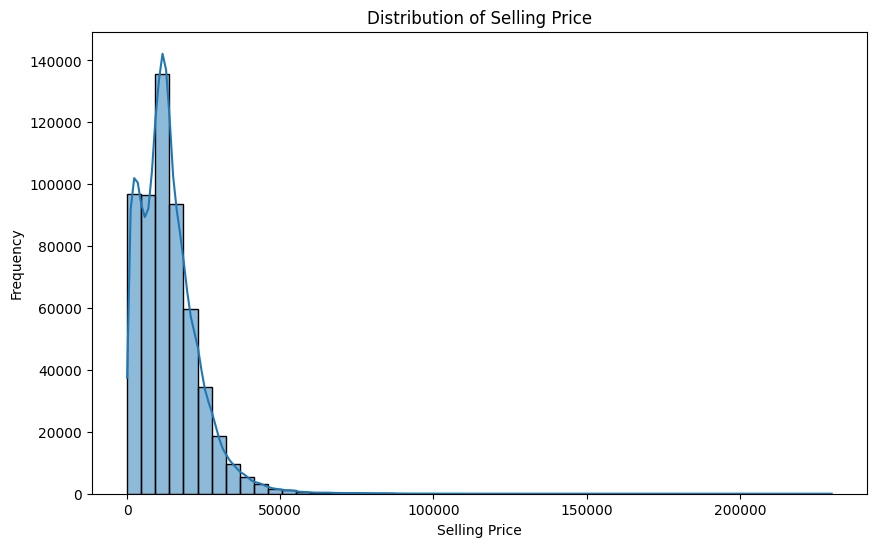

In [63]:
# Create a plot with the distribution of selling price

plt.figure(figsize=(10,6))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

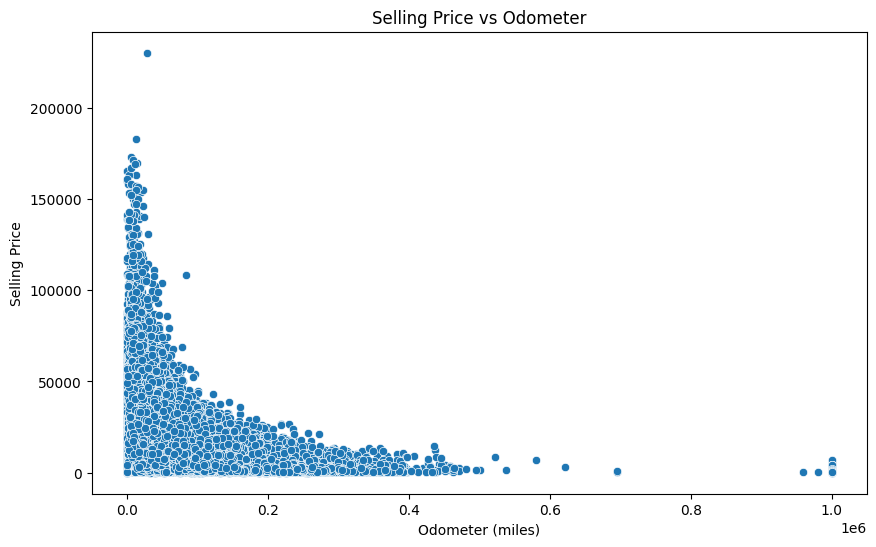

In [64]:
# Check how the odometer affects selling price

plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df)
plt.title('Selling Price vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price')
plt.show()

/tmp/ipython-input-65-1494947013.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='make', y='sellingprice', data=df[df['make'].isin(top_makes)], ci=None)


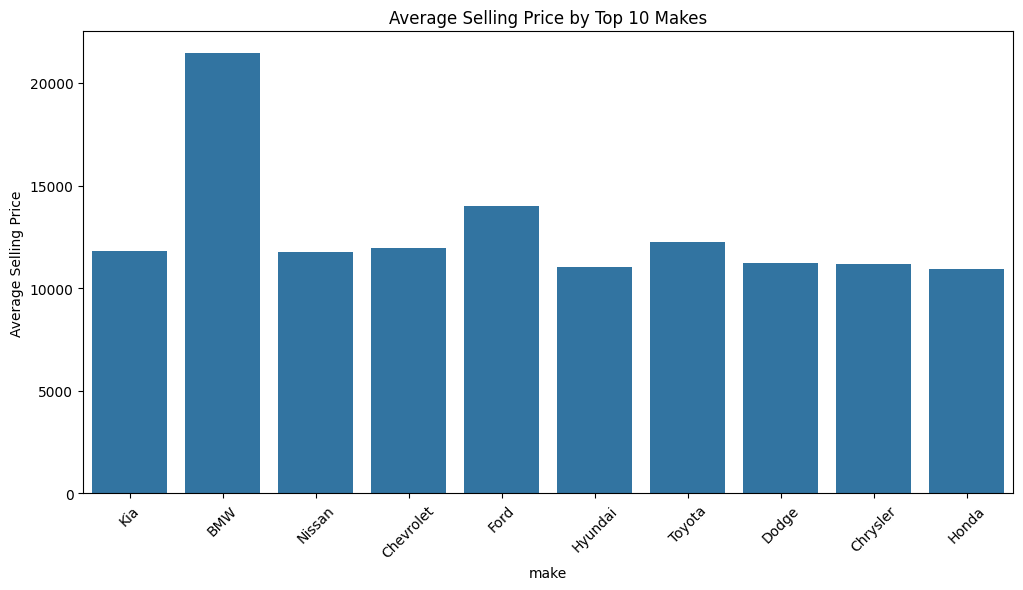

In [65]:
# Get the average selling price by make

plt.figure(figsize=(12,6))
top_makes = df['make'].value_counts().head(10).index
sns.barplot(x='make', y='sellingprice', data=df[df['make'].isin(top_makes)], ci=None)
plt.title('Average Selling Price by Top 10 Makes')
plt.xticks(rotation=45)
plt.ylabel('Average Selling Price')
plt.show()


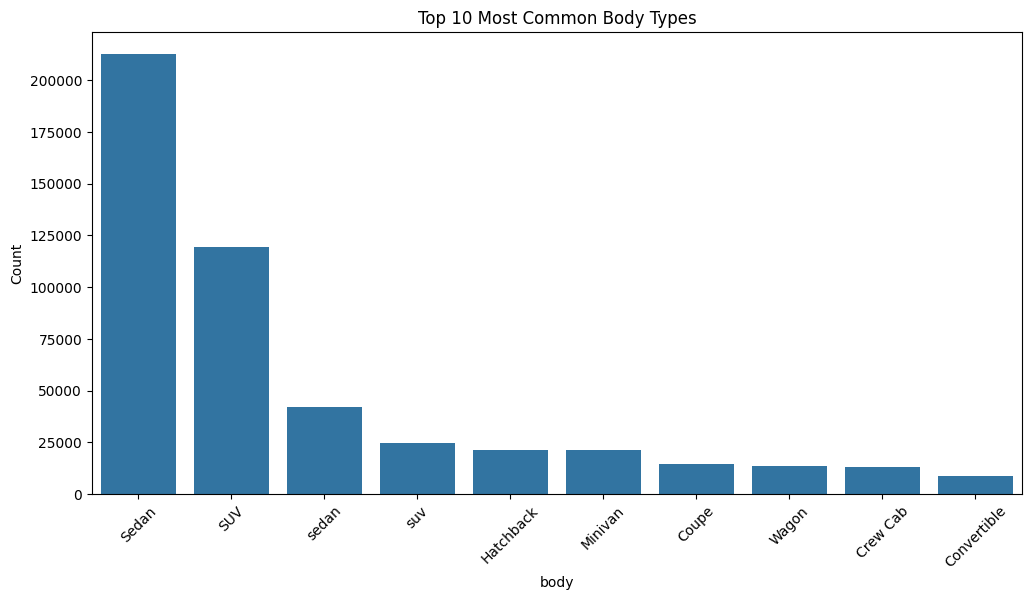

In [66]:
# Get the most common body types

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='body', order=df['body'].value_counts().index[:10])
plt.title('Top 10 Most Common Body Types')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


In [67]:
# Avg odometer for good or better condition (condition >=4) by make

query = """
SELECT
     make,
     AVG(odometer) AS avg_odometer
FROM df
WHERE condition >= 4
GROUP BY make
ORDER BY avg_odometer DESC
"""

result = duckdb.query(query).to_df()
print(result)

           make   avg_odometer
0      dodge tk  246997.000000
1           dot  191734.000000
2           gmc  162640.800000
3           Geo  159070.000000
4       hyundai  153947.733333
..          ...            ...
90        Tesla   17160.318182
91        Lotus   16932.000000
92  Lamborghini   16759.500000
93      Ferrari   14984.555556
94  Rolls-Royce   13824.117647

[95 rows x 2 columns]


In [68]:
# Most common car configuations

query = """
SELECT body, color, interior, COUNT(*) AS count
FROM df
GROUP BY body, color, interior
ORDER BY count DESC
LIMIT 10
"""

result = duckdb.query(query).to_df()
print(result)

    body   color interior  count
0  Sedan   black    black  23619
1  Sedan  silver    black  16920
2  Sedan    gray    black  16584
3  Sedan  silver     gray  14814
4    SUV   black    black  14163
5  Sedan   white    black  13818
6  Sedan    gray     gray  12457
7  Sedan   black     gray   9743
8  Sedan   white     gray   9403
9    SUV  silver    black   8719


In [69]:
# Cars sold by state

query = """
SELECT
    state,
    COUNT(*) AS total_cars_sold
FROM df
GROUP BY state
ORDER BY total_cars_sold DESC
LIMIT 10
"""

result = duckdb.query(query).to_df()
print(result)

  state  total_cars_sold
0    fl            82945
1    ca            73148
2    pa            53907
3    tx            45913
4    ga            34750
5    nj            27784
6    il            23478
7    nc            21845
8    oh            21575
9    tn            20895


In [70]:
# Most common make by state

query = """
SELECT state, make, COUNT(*) AS make_count
FROM df
GROUP BY state, make
QUALIFY RANK() OVER (PARTITION BY state ORDER BY COUNT(*) DESC) = 1
ORDER BY state DESC
LIMIT 30
"""

result = duckdb.query(query).to_df()
print(result)

   state       make  make_count
0     wi       Ford        1498
1     wa       Ford        1267
2     va       Ford        1860
3     ut       Ford         515
4     tx       Ford       10250
5     tn       Ford        5502
6     sc  Chevrolet         761
7     qc       Ford         554
8     pr     Toyota         534
9     pa       Ford        7186
10    or       Ford         229
11    on       Ford         782
12    ok       Ford          28
13    oh       Ford        3718
14    ny       Ford        2174
15    nv       Ford        1760
16    ns       Ford          21
17    nm       Ford          41
18    nj       Ford        4445
19    ne  Chevrolet         866
20    nc       Ford        3728
21    ms       Ford         486
22    mo       Ford        5661
23    mn       Ford        2538
24    mi       Ford        5792
25    md       Ford        1997
26    ma       Ford        1026
27    la       Ford         428
28    in  Chevrolet         799
29    il       Ford        5992


### Conclusions


*   The most common selling price is nearly 140,000
*   The higher the odometer miles, the lower the price
*   The most expensive make is BMW
*   The most common body type is sedan
*   The highest avg odometer for good or better condition make is Dodge
*   The most common car configuration is black sedan with black interiors
*   The state where most cars have been sold is FL
*   The most common make sold in the U.S is Ford


